#**CEFET-RJ**

**Programa de Pós-Gradução em Ciência da Computação - PPCIC**

**Mestrado em Ciência da Computação**

**Disciplina: Aprendizado de Máquina - 2021/1**

* **Trabalho 01**
* **Professor**: Eduardo Bezerra
* **Aluno**: Janio de Souza Lima

##Preparação do ambiente

Importação de bibliotecas

In [1]:
#Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.optimize as opt

Carga de arquivos para ambiente (apenas para uso deste notebook no Google Colab)

In [2]:
from google.colab import drive

In [3]:
#Conecta o Google Colab ao Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A etapa anterior apenas conecta ao seu Google Drive, após rodá-la e autenticar a sessão usando o link da API da Google, o código abaixo deve ser executado para apontar para o diretório de trabalho no qual estão gravados os códigos e bibliotecas personalziadas que serão usados na análise.

Os códigos* em questão estão disponíveis em: https://github.com/MLRG-CEFET-RJ/ml-class/tree/master/ml-t1/code

** Em alguns casos foi necessário adaptar partes das funções originais disponíveis no repositório citado ou substituí-las por versões que estão escritas nas próprias células deste notebook*

A pasta com os dados deve ser gravada neste mesmo diretório com o nome *data*, assim os trechos nos quais os conjuntos de dados são carregados rodarão sem problemas.

In [4]:
#Define o path dos códigos e dados como diretório de trabalho atual
import os
dir = '/content/drive/My Drive/Mestrado PPCIC/03. Curso/3. Aprendizado/code'
os.chdir(dir)

#1 Regressão Linear com uma variável

##Análise preliminar dos dados

In [5]:
#Carga dos dados usando as bibliotecas pandas e numpy
arquivo = 'data/ex1data1.txt'
dados = pd.read_table(arquivo,
                      sep=',',
                      header=None,
                      names=['Population', 'Profit'])

#Convertendo os dados para numpy array
x = np.array(dados.Population)
y = np.array(dados.Profit)

dados.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
#Informações gerais do dataset carregado
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [7]:
#Sumário estatístico dos dados
dados.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [8]:
#Correlação entre as variáveis do conjunto de dados
print(f'Correlação entre a característica (População) e o alvo (Lucro): {dados.Population.corr(dados.Profit, method="pearson"):.3f}')

Correlação entre a característica (População) e o alvo (Lucro): 0.838


##1.1 Visualização dos dados

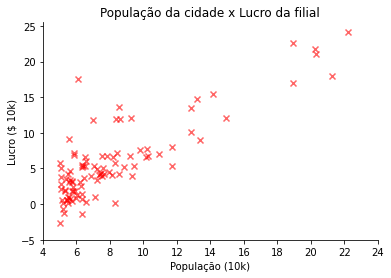

In [9]:
#Geração do gráfico de dispersão
plt.scatter(dados.Population,
            dados.Profit,
            marker='x',
            color='red',
            alpha=0.6)

plt.xticks([4,6,8,10,12,14,16,18,20,22,24])
plt.yticks([-5,0,5,10,15,20,25])

plt.title('População da cidade x Lucro da filial')
plt.xlabel('População (10k)')
plt.ylabel('Lucro ($ 10k)')

plt.savefig('target/plot1.1.png')

sns.despine()

**Checagem:** Carga dos dados e geração do gráfico de dispersão com a função ```plot``` da biblioteca personalizada fornecida no exercício.

In [10]:
import plot_ex1data1

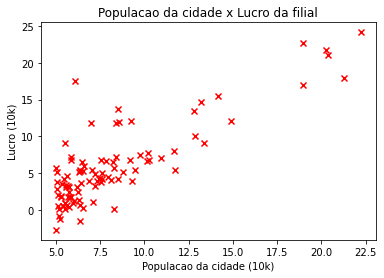

In [11]:
plot_ex1data1.plot()

Tanto a visualização da dispersão dos dados quanto a correlação calculada na análise preliminar demonstram que as variáveis "População" e "Lucro" apresentam uma correlação positiva entre si. Indicando um crescimento do lucro à medida que são observadas populações maiores.

##1.2 Gradiente Descendente

Carga do conjunto de dados, organizando os valores dos dados de População e Lucro em X e y, respectivamente.

In [12]:
X, y = plot_ex1data1.importarDados('/data/ex1data1.txt',
                                   ['Population', 'Profit'])

In [13]:
X.shape

(97, 1)

A carga dos dados da forma acima gera uma matriz X com 97 linhas e 1 coluna. Como a função de custos precisa que esta matriz seja composta por uma coluna de valores 1 relativa ao $\theta_0$ e outra com os valores das características de X, usamos o código a seguir para gerar a matriz no formato necessário. Isto se faz necessário para multiplicação do vetor de exemplos pelo vetor *theta*.

In [14]:
X = np.c_[np.ones((X.shape[0], 1)), x]
X.shape

(97, 2)

**Aplicação da função de custo**
 
Como pode ser observado na saída abaixo, obtemos um valor de 32,07 ao aplicarmos a função de custo para o conjunto de dados com os valores de $\theta$ = 0.

Neste ponto, criamos uma matriz de duas dimensões com os valores de $\theta$ zerados, para permitir realizar o teste da função de custos e posteriormente aplicar o Gradiente Descendente para calcular os valores de $\theta$ otimizados.

In [15]:
theta = np.array([0,0], ndmin=2).T

In [16]:
theta

array([[0],
       [0]])

Neste ponto aplicamos a função de custo com os parâmetros zerados para testar a implementação. Obtemos como resultado o valor previsto no exercício (32,07), confirmando a correção da implementação da função de custo.

In [17]:
from custo_reglin_uni import custo_reglin_uni
custo_reglin_uni(X, y, theta)

32.072733877455676

Com a função de custo já testada, os valores de theta iniciados com valor 0 e a matriz X já devidamente complementada com uma coluna de valores 1, aplicamos a função do gradiente descendente para encontrar os valores de theta.

In [18]:
from gd_reglin_uni import gd_reglin_uni

In [19]:
alpha=0.01
epochs=5000

In [20]:
history, theta = gd_reglin_uni(X, y, alpha, epochs, theta)

In [21]:
#print(custo, theta)
print(f'Custo: {history[-1]}\nTheta0: {theta[0][0]}\nTheta1: {theta[1][0]}')

Custo: 4.476971396982805
Theta0: -3.8953005106571683
Theta1: 1.1929853860482196


Considerando a aplicação do Gradiente Descendente com o valor de alpha = 0.01, 5000 épocas e os valores de theta começando em 0, obtemos $\theta_0 = -3.895$ e $\theta_1 = 1.193$. Além disso, obtemos o valor de custo de 4.47 a partir da função $J(\theta)$.

---

A seguir apresentamos a visualização da dispersão dos dados originais, marcados em vermelho, e a reta de ajustamento da **Regressão Linear**, marcada em azul.

In [22]:
import visualizar_reta

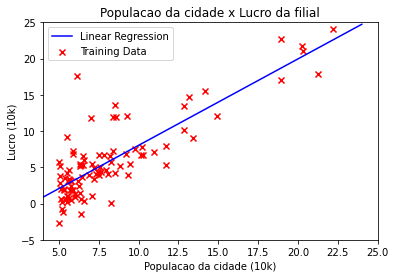

<Figure size 432x288 with 0 Axes>

In [23]:
visualizar_reta.plot('/data/ex1data1.txt',
                     theta)

**Uso da equação da regressão linear para previsão de valores**

Modelo de Regressão Linear: $h\theta(x) = \theta_0 + \theta_1x = -3.895 + 1.193 \times x$ (1)

In [24]:
def predicao(x, theta):
  """
  Função recebe um valor (escalar) x e retorna o valor previsto de y
  usando a equação da regressão linear construída nas etapas anteriores
  """
  
  pred = theta[0] + theta[1] * x

  return pred

In [25]:
population = 35000
lucro = predicao(population, theta)
print(f'{lucro[0]:.2f}')

41750.59


In [26]:
population = 70000
lucro = predicao(population, theta)
print(f'{lucro[0]:.2f}')

83505.08


De acordo com a Equação 1 da regressão linear encontrada:
* Para uma população de 35.000 habitantes o lucro previsto é de $ 41.750,59;

* Para 70.000 habitantes o lucro previsto é de $83.505,08.

---

  $h\theta(x) = \theta_0 + \theta_1x = -3.895 + 1.193 \times x$ (1)
   
  Então, para $x = 35000$, $y=41750,59$ e para $x = 70000$, $y=83505,08$.

##1.3 Visualização de $J(\theta)$

In [27]:
import visualizar_J_surface
import visualizar_J_contour

**Gráfico das curvas de nível da função de custo**

/content/drive/My Drive/Mestrado PPCIC/03. Curso/3. Aprendizado/code/visualizar_J_contour.py:27: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(theta0, theta1, J, levels=np.logspace(-1, 4, 20), color='blue')


<Figure size 432x288 with 0 Axes>

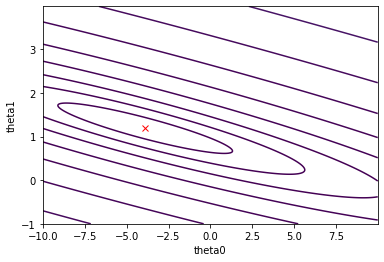

<Figure size 432x288 with 0 Axes>

In [28]:
J = visualizar_J_contour.plot(X, y, theta)

**Gráfico com recorte da superfície da função de custo**

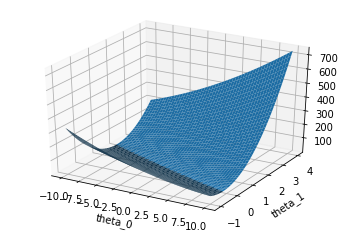

<Figure size 432x288 with 0 Axes>

In [29]:
visualizar_J_surface.plot(J)

**ANÁLISE DO RESULTADO DA ETAPA:** Nas visualizações desta subseção, primeiro apresentamos a visualização na qual o valor do mínimo global da função é exibido como um ponto vermelho nas coordenadas equivalentes aos valores de theta.

A segunda visualização, por sua vez, exibe um recorte da superfície da função $J(\theta)$ da **Regressão Linear**.

#2 Regressão Linear com Múltiplas Variáveis

##Análise preliminar dos dados

In [30]:
#Carga dos dados usando as bibliotecas pandas e numpy
arquivo = 'data/ex1data2.txt'
dados = pd.read_table(arquivo,
                      sep=',',
                      header=None,
                      names=['Tamanho', 'Dormitorios', 'Preco'])

dados.head()

,Tamanho,Dormitorios,Preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [31]:
dados.describe()

,Tamanho,Dormitorios,Preco
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [32]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Tamanho      47 non-null     int64
 1   Dormitorios  47 non-null     int64
 2   Preco        47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [33]:
dados.corr()

,Tamanho,Dormitorios,Preco
Tamanho,1.000000,0.559967,0.854988
Dormitorios,0.559967,1.000000,0.442261
Preco,0.854988,0.442261,1.000000


##2.1 Normalização das características

Carga dos dados, armazenando as características na Matriz X e o alvo no vetor y. Conferência das dimensões da matriz X e de seu conteúdo.

In [34]:
X, y = plot_ex1data1.importarDados('/data/ex1data2.txt',
                                   ['Tamanho', 'Dormitorios', 'Preco'])

In [35]:
X.shape

(47, 2)

In [36]:
X[:10]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4],
       [1985,    4],
       [1534,    3],
       [1427,    3],
       [1380,    3],
       [1494,    3]])

Aplicação da função ```normalizar_caracteristica``` para normalização das características armazenadas na matriz X e adição da coluna de 1 para representar o $\theta_0$.

In [37]:
from normalizacao import normalizar_caracteristica

In [38]:
X_norm, mean_X, std_X = normalizar_caracteristica(X)

Conferência dos dados normalizados. A função realizada a normalização usando Z-Score, gerando valores em uma escala similar.

In [39]:
X_norm[:5]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

**ANÁLISE DO RESULTADO DA ETAPA:**
Como a normalização é feita como uma operação vetorizada e com uso de estruturas de dados e funções das bibliotecas pandas e numpy que permitem a entrada de dados tanto de valores individuais quanto de matrizes completas sem necessidade de declaração explícita das características que serão analisadas, além de otimizar o desempenho do cálculo em comparação com operações tradicionais de loop, em função da operação conhecida como *broadcasting* que percorre todos os exemplos (linhas) de cada característica percorrida. Portanto, a função ```normalizar_característica``` consegue funcionar corretamente independentemente do número de características ou exemplos do conjunto de dados recebido como parâmetro.

Guardando valores da média e desvio padrão utilizados, para uso posterior.

Para armazenamento destas medidas estatísticas, alterei a função ```normalizar_caracteristica``` do código ```normalizacao.py```, apenas acrescentado no retorno as variáveis equivalentes a estas medidas que já eram calculadas na função devido à sua necessidade para o cálculo dos valores normalizados das características do conjunto de dados em análise.

Na linha abaixo são aprsentados os valores da média e desvio padrão, respectivamente, para cada característica.

In [40]:
print(f'Média: {mean_X}\nDesvio padrão: {std_X}')

Média: [2000.68085106    3.17021277]
Desvio padrão: [7.86202619e+02 7.52842809e-01]


##2.2 Gradiente descendente

Implementação da função de custos e do gradiente descendente para regressão linear com múltiplas variáveis

In [41]:
from gd_reglin_multi import gd

In [42]:
theta = np.array([0,0,0], ndmin=2).T
theta

array([[0],
       [0],
       [0]])

In [43]:
alpha = 0.01
epochs = 500

In [44]:
history, theta = gd(X_norm, y, alpha, epochs, theta)

In [45]:
print(f'Custo: {history[-1]}\nTheta:\n{theta}')

Custo: 2063782403.6748846
Theta:
[[ 3.38175984e+05]
 [ 1.03032124e+05]
 [-2.02325233e+02]]


Com a execução do gradiente descendente considerando taxa de aprendizado de $\alpha=0.01$, 500 épocas e $\theta$ iniciando em (0,0,0), encontramos os valores ótimos de $\theta$ e custo apresentados na última célula.

---

A visualização abaixo apresenta a curva de aprendizado ao longo das iterações do gradiente descedente.

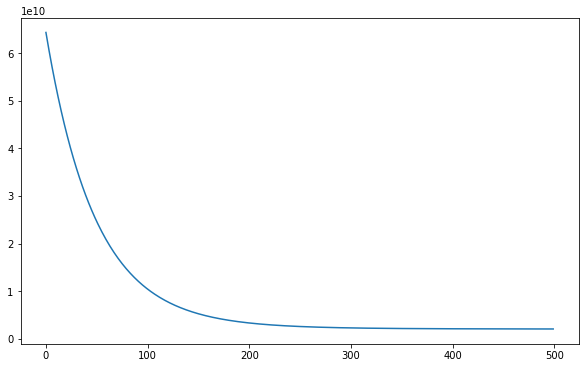

In [46]:
plt.figure(figsize=(10,6))
plt.plot(history)
plt.savefig('target/plot2.2.png')

#3 Regressão Logística

##Análise preliminar dos dados

In [47]:
#Carga dos dados usando as bibliotecas pandas e numpy
arquivo = 'data/ex2data1.txt'
dados = pd.read_table(arquivo,
                      sep=',',
                      header=None,
                      names=['Prova 1', 'Prova 2', 'Aprovado'])

dados.head()

,Prova 1,Prova 2,Aprovado
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [48]:
dados.describe()

,Prova 1,Prova 2,Aprovado
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [49]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Prova 1   100 non-null    float64
 1   Prova 2   100 non-null    float64
 2   Aprovado  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


##3.1 Visualização dos dados

In [50]:
import plot_ex2data1

A visualização a seguir apresenta a dispersão dos resultados de aprovação ou reprovação em função das notas das provas 1 e 2.

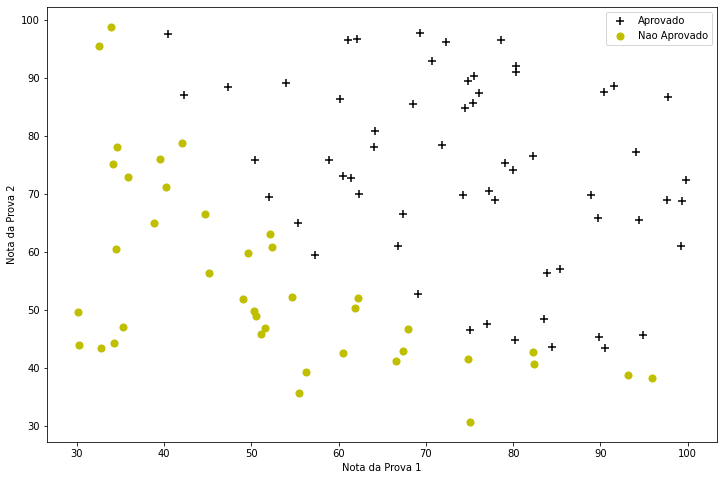

<Figure size 432x288 with 0 Axes>

In [51]:
plot_ex2data1.plot(dados)
plt.savefig('target/plot3.1.png')

##3.2 Implementação

###3.2.1 Função Sigmoide

In [52]:
from sigmoide import sigmoide

In [53]:
sigmoide(0)

0.5

Para teste da função ```sigmoide``` implementada, esta foi executada com parâmetro ```z=0```. O resultado esperado como retorno para este caso é um valor de 0.5.

###3.2.2 Função de custo e gradiente descendente

Uso da função ```importarDados``` para carregar as estruturas de dados necessárias para computação das funções de custo e do gradiente descendente.

In [54]:
from custo_reglog import custo_reglog

In [55]:
dados, X, y = plot_ex2data1.importarDados(insertOnes=False)

In [56]:
X.shape

(100, 2)

In [57]:
examData_norm, mean_examData, std_examData = normalizar_caracteristica(X)

In [58]:
examData_norm.shape

(100, 3)

In [59]:
y.shape

(100, 1)

Inicialização dos valores de $\theta$ como zero, para submissão à função de custos.

In [60]:
theta = np.array([0,0,0], ndmin=2)
theta

array([[0, 0, 0]])

In [61]:
theta.shape

(1, 3)

In [62]:
X = np.c_[np.ones((X.shape[0], 1)), X]

In [63]:
J = custo_reglog(theta, X, y)
J

0.6931471805599453

Ao executar a função de custo com os valores de $\theta$ zerados, tando com os valores originais quanto com os valores normalizados, obtemos o custo de 0.693, o que corresponde ao valor esperado para o teste da função.

**Comentários sobre a normalização dos conjunto de dados**
* O código proposto no exercício, ***seção 3.2.2 - Listagem 2***, indica a normalização dos atributos, por isso na etapa anterior realizamos os testes tanto com os dados originais quanto com estes normalizados.
* Contudo, a listagem dos dados originais (reproduzida a seguir) indica que os atributos estão em uma ordem de grandeza similar. Portanto, será averiguada na continuidade da análise se há necessidade de normalização ou não, mas a princípio esta normalização aparenta ser desnecessária para este conjunto de dados.
* Apesar destas considerações, a normalização para garantir que as características tenham escalas similares é importante para que o gradiente descedente não demore muito para convergir para o mínimo global da função em modelos que não tenham um único mínimo da função de custo.

In [64]:
dados.describe()

,Prova 1,Prova 2,Aprovado
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


###3.2.3 Aprendizado dos parâmetros

Neste ponto usamos a função ```fmin_tnc``` da biblioteca ```scipy.optimize``` e a implmentação do gradiente descendente para encontrar o vetor de $\theta$ que minimiza a função de custo.

In [65]:
import scipy.optimize as opt

In [66]:
from custo_reglog import custo_reglog

In [67]:
#from gd_reglog import gd_reglog
def gd_reglog(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parametros = int(theta.ravel().shape[1])
    grad = np.zeros(parametros)

    erro = sigmoide(X * theta.T) - y

    for i in range(parametros):
        term = np.multiply(erro, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [68]:
result = opt.fmin_tnc(func=custo_reglog, x0=theta, fprime=gd_reglog, args=(examData_norm, y))
theta_ = result[0]
J = custo_reglog(theta_, examData_norm, y)

In [69]:
theta_

array([1.71787865, 3.99150585, 3.72363973])

In [70]:
print('Custo = ', J)

Custo =  0.20349771564631666


Com a aplicação do gradiente descendente encontramos (1.718, 3.992, 3.724) com vetor de valores ótimos de $\theta$.

---

Usamos este vetor para calcular a função de custo e encontramos um valor de 0.203, conforme código a seguir.

###3.2.4 Avaliação do modelo

As funções a seguir realizam a predição e a probabilidade desta predição usando os parâmetros (vetor *theta*) calculados na etapa anterior.

Aplicando os valores de $\theta$ para prever a aprovação de uma luno com notas 45 e 85 para provas 1 e 2, respectivamente, encontramos o seguinte resultado:
* Previsão: Aprovação;
* Probabilidade: 0,78.

In [71]:
new_x = np.array([45,85]) 

new_x_norm = (new_x - mean_examData) / std_examData
new_x_norm = np.insert(new_x_norm, 0, 1)

theta = np.matrix(theta_)

h = sigmoide(new_x_norm.dot(theta.T)) * 100

print('Probabilidade de aprovação: {0:.0f}%'.format(h[0,0]))

Probabilidade de aprovação: 78%


In [72]:

#from predizer_aprovacao import predizer, acuracia
"""
Funções do exercício substituídas pelas versões abaixo devido necessidades de 
ajuste na forma como os dados são recebidos, tratados ou calculados.
"""

def pred_log(theta, x):
  """
  Função realizada predição da classe para x de acordo com os valores de theta.
  """
  y_prob = prob_log(theta,x)
  return np.round(y_prob).astype(np.int)

def prob_log(theta, x):
  """
  Função calcula a probabilidade de x pertencer a classe 1
  """
  return sigmoide(np.dot(x, theta))

Aplicando os valores de $\theta$ para prever a aprovação em relação aos dados da matriz $X$ que contém os valores origiais do conjunto de treinamento.
* Previsão: Os valores 1 no vetor resultante equivalem à aprovação do aluno, enquanto os valores 0 equivalem à reprovação;
* Acurácia: apresenta a percentagem de acertos.

In [73]:
def predizer(theta, X):
    probabilidade = sigmoide(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probabilidade]

def acuracia(X, y, result):
    theta_min = np.matrix(result[0])  
    predicoes = predizer(theta_min, X)  
    corretas = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predicoes, y)]  
    return (sum(map(int, corretas)) % len(corretas))

In [74]:
pred_log(theta_, examData_norm)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [75]:
acc = acuracia(examData_norm, y, result)

print('Acurácia sobre o conjunto de treinamento: {0:.0f}%.'.format(acc))

Acurácia sobre o conjunto de treinamento: 89%.


#4 Regressão Logística com Regularização

##Análise preliminar dos dados

In [76]:
data = pd.read_csv('data/ex2data2.txt',
                   header = None,
                   names = ['Teste 1', 'Teste 2', 'Status'])

In [77]:
data.head()

,Teste 1,Teste 2,Status
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [78]:
data.describe()

,Teste 1,Teste 2,Status
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [79]:
data.Status.value_counts()

0    60
1    58
Name: Status, dtype: int64

##4.1 Visualização gráfica

A função criada abaixo analisa a coluna Resultado do conjunto de dados (classe $y$), e gera a dispersão de acordo com sua aceitação ou rejeição. Sendo aceito quando $y=1$ e rejeitado quando $y=0$.

In [80]:
Xplot = data.iloc[:, :2]
yplot = data.iloc[:, 2]

In [81]:
def plot_(X, y):
    positive = y == 1
    negative = y == 0

    plt.figure(figsize=(10,6))
    
    plt.plot(X[positive, 0], X[positive, 1],
             'b+', markeredgewidth=2, markersize=7, alpha=0.7)
    plt.plot(X[negative, 0], X[negative, 1],
             'ro', markerfacecolor='r', markersize=7, alpha=0.7)

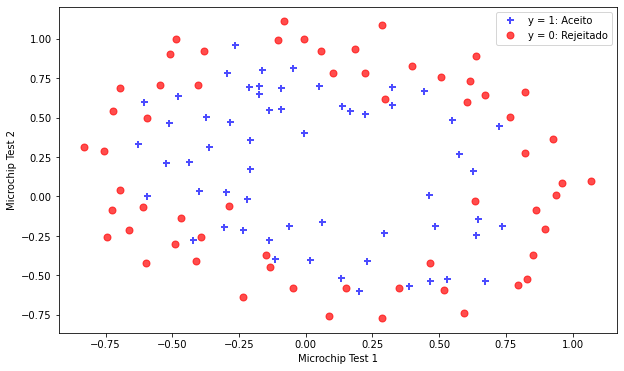

In [82]:
# Visualização dos dados  - Pontos de dados do conjunto (fig 4)
plot_(np.array(Xplot), np.array(yplot))

# Rótulos e legenda
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1: Aceito', 'y = 0: Rejeitado'])

plt.savefig('target/plot4.1.png')

plt.show()

O gráfico da dispersão gerada apresentada os testes aceitos marcados em azul e os rejeitados marcados em vermelho.

##4.2 Mapeamento de características

Nesta seção realizamos o mapeamento de características usando as características originais, notas dos Testes 1 e 2 (tratados como $x_1$ e $x_2$), para gerar novas características correspondendentes a seus termos polinomiais até o expoente de grau 6. 

Para este objetivo, é usada a função ```mapFeature``` que recebe os valores de $x_1$ e $x_2$, o grau polinomial e retorna um vetor com os termos polinomiais de $x_1$ e $x_2$ até o grau definido, neste caso um vetor 28 colunas, equivalentes aos termos, e 118 linhas, equivalentes à aplicação do polinômio aos valores originais da linha correspondente.

In [83]:
%run util/read_dataset.py

filepath = 'data/ex2data2.txt'
X, y = read_dataset(filepath)
X[:5,:]

array([[ 0.051267,  0.69956 ],
       [-0.092742,  0.68494 ],
       [-0.21371 ,  0.69225 ],
       [-0.375   ,  0.50219 ],
       [-0.51325 ,  0.46564 ]])

<Figure size 432x288 with 0 Axes>

In [84]:
%run mapFeature.py

feature_1 = np.array(X[:,0])
feature_2 = np.array(X[:,1])

X = mapFeature(feature_1, feature_2)

print(X.shape)

(118, 28)


A listagem a seguir confere os valores do vetor gerado no mapeamento de características e as dimensões deste vetor. 

In [85]:
X

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

In [86]:
X.shape

(118, 28)

##4.3 Função de Custo e Gradiente Descendente

In [87]:
from sigmoide import sigmoide

Para $\lambda=1$

In [88]:
%run custo_reglog_reg.py

_lambda = 1
theta = np.zeros((X.shape[1])) #inicialização
J = custo_reglog_reg(theta, X, y, _lambda)
print('Custo = ', J)

Custo =  0.6931471805599451


Para $\lambda=0$

In [89]:
%run custo_reglog_reg.py
%run gd_reglog_reg.py

_lambda = 0
theta = np.zeros((X.shape[1])) #inicialização
result = opt.fmin_tnc(func=custo_reglog_reg, x0=theta, fprime=gd_reglog_reg, args=(X, y, _lambda))
theta = result[0]
J = custo_reglog_reg(theta, X, y, _lambda)

print('Vetor de parâmetros = ', theta)
print('\nCusto = ', J)

Vetor de parâmetros =  [   12.77908481    16.49992762     7.36168342  -140.0689641
   -82.626573     -47.32272413  -134.29479797  -113.6610402
   -56.14324677    -4.10861092   510.70466523   507.56922885
   566.66305886   258.98915504    56.95402121   247.5193485
   350.83103498   371.75202507   194.13604466    69.46621389
    15.14801323  -600.92424344  -821.86040683 -1106.80924821
  -848.64036255  -706.48745788  -292.82673998   -50.26186711]

Custo =  0.25308573494688313


Para $\lambda=100$

In [90]:
_lambda = 100
theta = np.zeros((X.shape[1])) #inicialização
result = opt.fmin_tnc(func=custo_reglog_reg, x0=theta, fprime=gd_reglog_reg, args=(X, y, _lambda))
theta = result[0]
J = custo_reglog_reg(theta, X, y, _lambda)

print('Vetor de parâmetros = ', theta)
print('\nCusto = ', J)

Vetor de parâmetros =  [ 2.87015383e-04 -2.10544242e-03  1.22391072e-03 -6.79678110e-03
 -1.74408066e-03 -4.46041042e-03 -2.26497645e-03 -9.37866502e-04
 -1.13248462e-03 -2.62435498e-03 -5.46183984e-03 -3.06831194e-04
 -1.75796213e-03 -4.68279970e-04 -5.03984839e-03 -2.62545344e-03
 -5.89312935e-04 -4.48411790e-04 -7.84188445e-04 -6.48156747e-04
 -3.88185402e-03 -4.31900558e-03 -1.35539797e-04 -8.84096665e-04
 -4.96564783e-05 -9.97763028e-04 -2.09723993e-04 -5.06602296e-03]

Custo =  0.6927650676796886


Para teste da função de custos para **Regressão Logística Regularizada**, a mesma foi executada com os valores de $\theta$ zerados e o valor de $\lambda=1$, obtendo $J$ com valor esperado (0.693). Em seguida foram realizadas execuções também com com $\lambda=0$ e $\lambda=100$.

---
A seguir aplicamos a função de custos para obtenção dos valores otimizados de $\theta$.

In [91]:
_lambda = 1
theta = np.zeros((X.shape[1])) #inicialização
result = opt.fmin_tnc(func=custo_reglog_reg, x0=theta, fprime=gd_reglog_reg, args=(X, y, _lambda))
theta = result[0]
J = custo_reglog_reg(theta, X, y, _lambda)

print('Vetor de parâmetros = ', theta)
print('\nCusto = ', J)

Vetor de parâmetros =  [ 0.51126521  0.28141979  0.56732707 -0.89264983 -0.33269562 -0.50931638
  0.06978521 -0.14679472 -0.15051146 -0.04162217 -0.63602971 -0.03068704
 -0.26998237 -0.08940903 -0.47099374 -0.07027425 -0.08868329 -0.0384868
 -0.11459476 -0.10674824 -0.18602658 -0.43208855  0.00445043 -0.13397984
 -0.00181124 -0.14157615 -0.03660799 -0.37996296]

Custo =  0.651887301156613


##4.4 Esboço da Fronteira de Decisão

Apresentamos a seguir plotagem da dispersão dos valores e sobre estes é esboçada a **Fronteira de Decisão**, representada pela forma em verde neste gráfico, que separa os valores positivos e negativos do nosso conjunto de dados.

Esta fronteira foi desenhada com a função ```plotDecisionBoundary```, que recebe os valores ótimos de $\theta$, as características mapeadadas a partir dos termos dos polinômios de $x1$ e $x2$ e os valores da classe alvo ($y$).

/content/drive/My Drive/Mestrado PPCIC/03. Curso/3. Aprendizado/code/mapFeature.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(out)


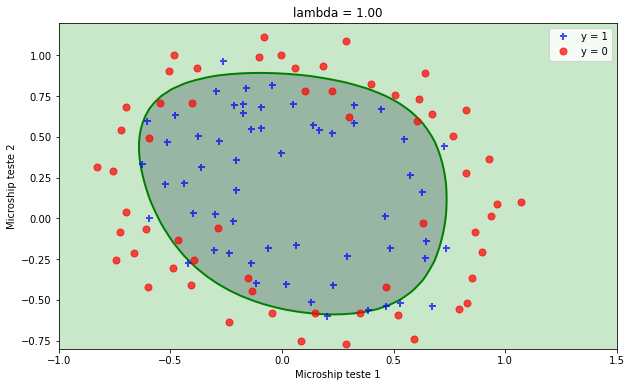

In [92]:
%run plotDecisionBoundary.py
%matplotlib inline

plot_(np.array(Xplot),
      np.array(yplot))

plotDecisionBoundary(theta, X, y)
plt.xlabel('Microship teste 1')
plt.ylabel('Microship teste 2')
plt.legend(['y = 1', 'y = 0'])
plt.grid(False)
plt.title('lambda = %0.2f' % _lambda)
plt.savefig('target/plot4.4.png')

#5 Regressão Linear com Regularização

##Análise preliminar dos dados

In [93]:
import scipy.io as spio
arquivo = 'data/ex5data1.mat'
data = spio.loadmat(arquivo,
                    squeeze_me=True)

In [94]:
treinamento = pd.DataFrame({'X': data['X'],
                            'y': data['y']})

In [95]:
validacao = pd.DataFrame({'Xval': data['Xval'],
                            'yval': data['yval']})

In [96]:
teste = pd.DataFrame({'Xtest': data['Xtest'],
                            'ytest': data['ytest']})

In [97]:
treinamento.describe()

,X,y
count,12.000000,12.000000
mean,-5.085426,11.217589
std,29.964402,13.048466
min,-48.058829,1.173257
25%,-30.541301,2.494216
50%,-3.776152,3.735931
75%,17.171532,16.720808
max,37.492187,36.837955


In [98]:
validacao.describe()

,Xval,yval
count,21.000000,21.000000
mean,-4.207026,12.906584
std,30.293175,13.028210
min,-50.013244,-0.000044
25%,-31.109554,4.170202
50%,-3.263862,8.348712
75%,25.374099,19.365053
max,46.282369,52.781928


In [99]:
teste.describe()

,Xtest,ytest
count,21.000000,21.000000
mean,-4.564866,13.449414
std,30.929739,14.541524
min,-55.940571,0.130430
25%,-33.318004,4.079367
50%,-6.132596,6.566065
75%,21.261183,17.088487
max,44.209886,55.384373


##5.1 Visualização dos dados

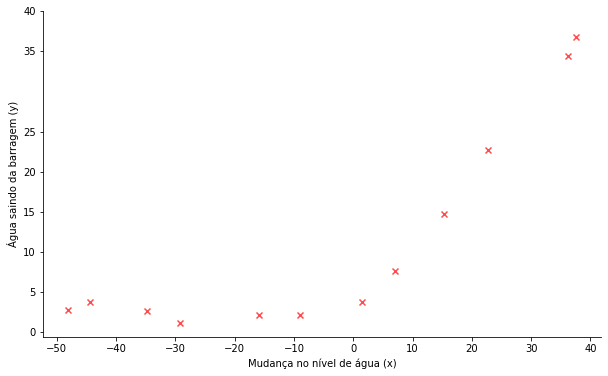

In [100]:
plt.figure(figsize=(10,6))
plt.scatter(treinamento['X'], treinamento['y'],
            color='r', alpha=0.7,
            marker='x')

plt.xlabel('Mudança no nível de água (x)')
plt.ylabel('Água saindo da barragem (y)')

plt.yticks([0,5,10,15,20,25,35,40])
plt.xticks([-50,-40,-30,-20,-10,0,10,20,30,40,])

sns.despine()

plt.savefig('target/plot5.1.png')

##5.2 Função de custo da regressão linear regularizada

Esta seção realizada a aplicação da função de custo, implmentada a função de custo da regressão linear regularizada $J(\theta)$, conforme abaixo, que implementa $\lambda$ como um hiperparâmetro que controla o grau de regularização impondo uma penalidade sobre o custo total $J$

$
J(\theta) = \frac{1}{2m}[ \sum_{i=1}^{m} (h\theta(x^i) - (y^i)^2]+\frac{\lambda}{2m} \sum_{j=1}^{n} \theta _j^2
$



In [101]:
X_ = np.array(treinamento['X'], ndmin=2).T
X_.shape

(12, 1)

In [102]:
X_ = np.c_[np.ones((X_.shape[0], 1)), X_]
X_.shape

(12, 2)

In [103]:
y_ = np.array(treinamento['y'], ndmin=2).T
y_.shape

(12, 1)

In [104]:
from custo_reglin_regularizada import custo_reglin_regularizada

In [105]:
_lambda = 1
theta = np.array([[1,1]]) #inicialização
J = custo_reglin_regularizada(theta, X_, y_, _lambda)
print('Custo = ', J)

Custo =  303.9931922202643


Usando *theta* inicializado como (1,1) obtemos o valor de custo de 303.993, conforme previsto para confirmar a corretude da função implementada.

##5.3 Gradiente da regressão linear regularizada

A seguir aplicamos a função implementada do gradiente descedente para calcular com os mesmos parâmetros usados na seção anterior, ou seja, valores de $\theta$ inicializados como (1,1) e $\lambda=1$.

Com estes parâmetros encontramos como resultado (-15.303, 598.250).

In [106]:
from gd_reglin_regularizada import gd_reglin_regularizada

In [107]:
gd_reglin_regularizada(theta, X_, y_, _lambda)

matrix([[-15.30301567],
        [598.25074417]])

##5.4 Ajustando os parâmetros da regressão linear

Nessa seção usamos a função de custos regularizada para ajustar os valores ótimos de $\theta$, mas usando $\lambda=0$, ou seja, sem regularização. Em seguida é feita a visualização da curva de regressão com os valores ótimos identificados.

---

Nesta primeira célula, importamos a ferramenta de otimização de valores da biblioteca ```scipy``` e definimos uma função usa esta ferramenta para encontrar os valores ótimos de $\theta$.

In [108]:
import scipy.optimize as opt
def encontrar_theta_otimo(theta, X, y, _lambda):
    return opt.fmin_tnc(func = custo_reglin_regularizada, 
        x0=theta, fprime=gd_reglin_regularizada, 
        args=(X, y, _lambda))

O trecho abaixo aplica a otimização do gradiente descedente, sem regularização ($\lambda=0$), encontrando os valores (13.087, 0.367) com um custo de 22.374.

Em seguida é gerada a curva de ajustamento da regressão linear e realizada sua plotagem em conjunto com a dispersão dos dados originais.

In [109]:
_lambda = 0
result = encontrar_theta_otimo(theta, X_, y_, _lambda)
theta = result[0]
J = custo_reglin_regularizada(theta, X_, y_, _lambda)

In [110]:
print('Vetor de parâmetros = ', theta)
print('Custo = ', J)

Vetor de parâmetros =  [13.08790367  0.36777923]
Custo =  22.373906495108923


In [111]:
h = X_.dot(theta.T)

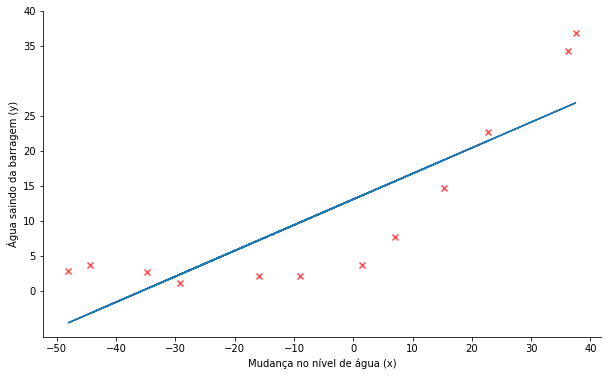

In [112]:
plt.figure(figsize=(10,6))
plt.scatter(treinamento['X'], y_,
            color='r', alpha=0.7,
            marker='x')

plt.plot(treinamento['X'], h)

plt.xlabel('Mudança no nível de água (x)')
plt.ylabel('Água saindo da barragem (y)')

plt.yticks([0,5,10,15,20,25,35,40])
plt.xticks([-50,-40,-30,-20,-10,0,10,20,30,40,])

sns.despine()

plt.savefig('target/plot5.4.png')

Como percebemos pela visualização o modelo possui um alto viés, não conseguindo acompanhar o comportamento dos dados e portanto, tendo baixa capacidade preditiva.

#6 Viés-Variância

##6.1 Curva de aprendizado

Nessa seção é feito o cálculo dos erros usando conjunto de treino e conjunto de validação para permitir a comparação entre as duas situações e gerar a curva de aprendizado que permite essa avaliação de forma gráfica.

In [113]:
def learningCurve(theta, X, y, X_val, y_val, _lambda):
    m = len(X)
    erros_treino = np.zeros(m)
    erros_val = np.zeros(m)
    qtds_exemplos = []
    
    for i in range(1,m+1):
        X_train = X[:i,:]
        y_train = y[:i]
        qtds_exemplos.append(len(X_train))
        
        result = encontrar_theta_otimo(theta, X_train, y_train, _lambda)
        theta = result[0]
        
        J_train = custo_reglin_regularizada(theta, X_train, y_train, _lambda=0)
        J_val = custo_reglin_regularizada(theta, X_val, y_val, _lambda)
        
        erros_treino[i-1] = J_train
        erros_val[i-1] = J_val
    
    return qtds_exemplos, erros_treino, erros_val

In [114]:
X_val = np.array(validacao['Xval'], ndmin=2).T

In [115]:
X_val = np.c_[np.ones((X_val.shape[0], 1)), X_val]

In [116]:
y_val = np.array(validacao['yval'], ndmin=2).T

In [117]:
lamb=0
theta = np.array([[1,1]]).T #inicialização

In [118]:
qtds_exemplos, erros_treino, erros_val = learningCurve(theta,
                                                       X_, y_,
                                                       X_val, y_val,
                                                       lamb)

In [119]:
print(f'Quantidade de exempos: {qtds_exemplos}\n\nErros de treino: {erros_treino}\n\nErros de validação: {erros_val}')

Quantidade de exempos: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Erros de treino: [8.63153419e-18 6.09573022e-18 3.28659505e+00 2.84267769e+00
 1.31540488e+01 1.94439625e+01 2.00985217e+01 1.81728587e+01
 2.26094054e+01 2.32614616e+01 2.43172496e+01 2.23739065e+01]

Erros de validação: [169.87070841 110.30036593  45.01023162  48.36891133  35.86516478
  33.82996162  31.97098581  30.86244633  31.13599796  28.93620747
  29.55143162  29.43381813]


A visualização gráfica a seguir apresenta a curva de aprendizado da Regressão Linear com os dados de treino e validação, comparando a evolução dos erros para diferentes tamanhos dos conjuntos de treinamento.

É possível perceber que os erros no conjunto de treino começam muito inferiores aos encontrados no conjunto de validação e vão convergindo para o mesmo nível à medida que o número de exemplos aumenta. Contudo, mesmo quando encontram um nível similar a um platô ainda há um *gap* entre as duas curvas, mostrando que o modelo erra menos no conjunto de treino.

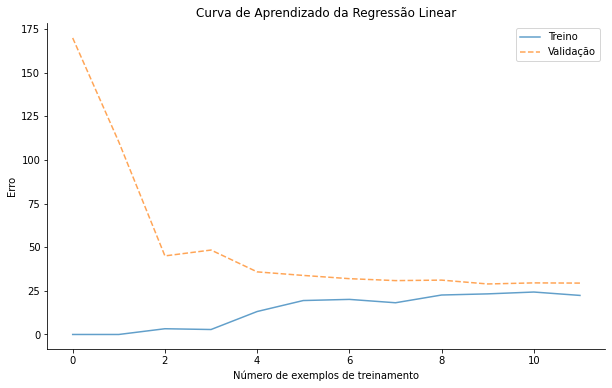

In [120]:
plt.figure(figsize=(10,6))
plt.plot(erros_treino, alpha=0.7)
plt.plot(erros_val, '--', alpha=0.7)
plt.legend(['Treino', 'Validação'])
plt.xlabel('Número de exemplos de treinamento')
plt.ylabel('Erro')
plt.title('Curva de Aprendizado da Regressão Linear')
plt.savefig('target/plot6.1.png')
sns.despine()

#7 Regressão Polinomial

##7.1 Regressão polinomial - aprendizado

Inicialmente realizamos a geração de novas características equivalantes com base no polinômio de grau 8 do $X$ original.

In [145]:
from poly_features import polyFeatures

In [146]:
X_ = np.array(data['X'], ndmin=2).T

In [147]:
grau = 8
X_poli = polyFeatures(X_, grau)

In [148]:
X_poli.shape

(12, 8)

In [149]:
X_

array([[-15.93675813],
       [-29.15297922],
       [ 36.18954863],
       [ 37.49218733],
       [-48.05882945],
       [ -8.94145794],
       [ 15.30779289],
       [-34.70626581],
       [  1.38915437],
       [-44.38375985],
       [  7.01350208],
       [ 22.76274892]])

In [150]:
X_poli[:5]

array([[-1.59367581e+01,  2.53980260e+02, -4.04762197e+03,
         6.45059724e+04, -1.02801608e+06,  1.63832436e+07,
        -2.61095791e+08,  4.16102047e+09],
       [-2.91529792e+01,  8.49896197e+02, -2.47770062e+04,
         7.22323546e+05, -2.10578833e+07,  6.13900035e+08,
        -1.78970150e+10,  5.21751305e+11],
       [ 3.61895486e+01,  1.30968343e+03,  4.73968522e+04,
         1.71527069e+06,  6.20748719e+07,  2.24646160e+09,
         8.12984311e+10,  2.94215353e+12],
       [ 3.74921873e+01,  1.40566411e+03,  5.27014222e+04,
         1.97589159e+06,  7.40804977e+07,  2.77743990e+09,
         1.04132297e+11,  3.90414759e+12],
       [-4.80588295e+01,  2.30965109e+03, -1.10999128e+05,
         5.33448815e+06, -2.56369256e+08,  1.23208064e+10,
        -5.92123532e+11,  2.84567638e+13]])

Em seguida normalizamos as características para deixá-las na mesma escala.

In [151]:
from normalizacao import normalizar_caracteristica

In [152]:
X_Norm, X_Norm_mean, X_Norm_std = normalizar_caracteristica(X_poli)

In [153]:
X_Norm.shape

(12, 9)

In [154]:
X_[0]

array([-15.93675813])

In [155]:
X_poli[0]

array([-1.59367581e+01,  2.53980260e+02, -4.04762197e+03,  6.45059724e+04,
       -1.02801608e+06,  1.63832436e+07, -2.61095791e+08,  4.16102047e+09])

In [156]:
X_Norm[0]

array([ 1.        , -0.3782437 , -0.78866232,  0.19032872, -0.7375913 ,
        0.32025197, -0.6171516 ,  0.35983501, -0.53109126])

Nesta parte da análise, serão aprendidos os parâmetros e gerada a visualização com a regressão polinomial.

In [157]:
print(X_Norm.shape, y_.shape)

(12, 9) (12, 1)


In [158]:
from custo_reglin_multi import custo_reglin_multi
import gd_reglin_multi
from plot_ex5data1 import plot_ex5data1
from plot_learning_curve import plot_learning_curve

In [159]:
_lambda = 0.003
theta = np.ones((X_Norm.shape[1])) #inicialização
result = encontrar_theta_otimo(theta, X_Norm, y_, _lambda)
theta_ = result[0]

print('Vetor de parâmetros\n',theta_)

Vetor de parâmetros
 [ 11.21758156  11.23243789  13.34820938   8.58292448  -9.26145596
 -10.73863263   4.12880494   1.77973445  -3.39673752]


In [160]:
print(y_.shape, theta_.shape)

(12, 1) (9,)


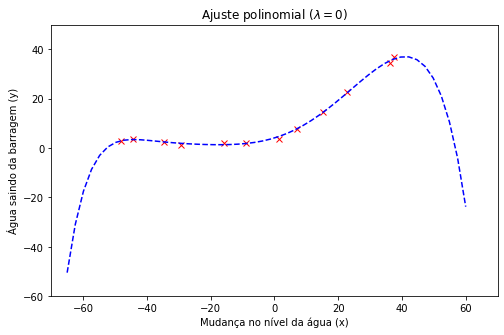

In [161]:
x = np.linspace(-65,60,50)
x = x.reshape((len(x),1))
x_poli = polyFeatures(x, grau)
x_poli = (x_poli - X_Norm_mean) / X_Norm_std
x_poli = np.insert(x_poli, 0, 1, axis=1)

h = x_poli.dot(np.matrix(theta_).T)

plot_ex5data1(X_, y_)
plt.plot(x, h, 'b--')

plt.title('Ajuste polinomial ($\lambda = 0$)')
plt.axis((-70,70,-60,50))

plt.savefig('target/plot7.1.1.png')

O modelo gerado pelo ajuste polinomial se adequa bem aos dados, conforme pode ser visto pela curva marcada em azul na visualização. Contudo, o modelo demonstra ter alta variância e com *overfitting*.

---

Para reforçar esta análise, plotamos a curva de aprendizado que demonstra que o modelo possui erros de treinamento muito baixos, se aproximando de 0, mas elevados níveis de erro de validação.

In [162]:
X_val = np.array(data['Xval'], ndmin=2).T

In [163]:
X_poli_val = polyFeatures(X_val, grau)

In [164]:
X_norm_val, _, _ = normalizar_caracteristica(X_poli_val)

In [165]:
X_norm_val[0]

array([ 1.        , -0.42416069, -0.75311565,  0.12753599, -0.7369401 ,
        0.24552665, -0.63413413,  0.26698715, -0.55310478])

In [166]:
theta = np.ones((X_norm_val.shape[1])) #inicialização

In [167]:
numero_exemplos, erros_treino, erros_val = learningCurve(theta, X_Norm, y_, X_norm_val, y_val, _lambda=0)

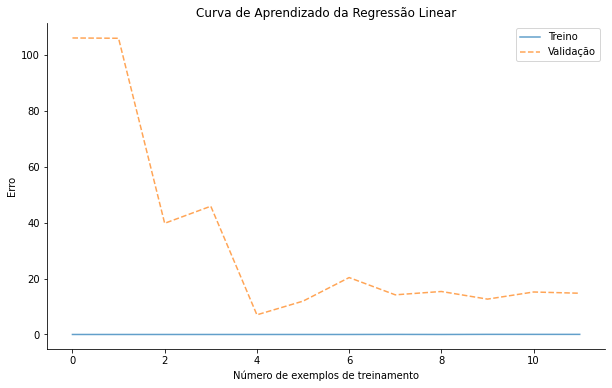

In [168]:
plt.figure(figsize=(10,6))
plt.plot(erros_treino, alpha=0.7)
plt.plot(erros_val, '--', alpha=0.7)
plt.legend(['Treino', 'Validação'])
plt.xlabel('Número de exemplos de treinamento')
plt.ylabel('Erro')
plt.title('Curva de Aprendizado da Regressão Linear')
plt.savefig('target/plot7.1.2.png')
sns.despine()

#Referências

**Referências**

McKinney, Wes (2018). **Python para Análise de Dados**: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec.

Géron, Aurélien (2019). **Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow:** Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

Grus, Joel (2016). **Data Science do Zero:** Primeiras regras com Python. Traduzido por Welington Nascimento. Alta Books.

---

**Algoritmos e conjuntos de dados:**

https://github.com/MLRG-CEFET-RJ/ml-class/tree/master/ml-t1